In [53]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import yaml

import torch
import torch.nn as nn

from net.basenet import GaussNet3
from dataprocess.sirst import NUDTDataset, IRSTD1kDataset

- params' names:
    - multiscalef.pyramid.0.conv1.conv2d.weight
    - multiscalef.pyramid.0.conv1.conv2d.bias
    - multiscalef.pyramid.0.conv1.bn.weight
    - multiscalef.pyramid.0.conv1.bn.bias
    - multiscalef.pyramid.0.conv1.bn.running_mean
    - multiscalef.pyramid.0.conv1.bn.running_var
    - multiscalef.pyramid.0.conv1.bn.num_batches_tracked
    - multiscalef.pyramid.0.gauss.tempreture
    - multiscalef.pyramid.0.gauss.bias
    - multiscalef.pyramid.0.gauss.atten.weight
    - multiscalef.pyramid.0.conv2.conv2d.weight
    - multiscalef.pyramid.0.conv2.conv2d.bias
    - multiscalef.pyramid.0.conv2.bn.weight
    - multiscalef.pyramid.0.conv2.bn.bias
    - multiscalef.pyramid.0.conv2.bn.running_mean
    - multiscalef.pyramid.0.conv2.bn.running_var
    - multiscalef.pyramid.0.conv2.bn.num_batches_tracked

In [52]:
pt_path = "result/20240812T10-12-55_gauss8_1_irstd1k\latest.pkl"
params = torch.load(pt_path)
# for key in params:
#     print(key)
print(params["resconv.block1.gauss.atten.weight"])

tensor([[[[ 0.0405,  0.1505,  0.0314],
          [ 0.1200, -0.3581,  0.1325],
          [ 0.0455,  0.0776,  0.0073]]]], device='cuda:0')


In [5]:
cfg_path = 'cfg.yaml'
with open(cfg_path) as f:
    cfg = yaml.safe_load(f)

net = GaussNet3(1, cfg)

In [30]:
from torchvision import transforms

augment = transforms.Compose([
                    transforms.RandomAffine(degrees=180, translate=(0.1, 0.1), shear=0),
                ])

In [33]:
pict = np.array(cv2.imread('W:/DataSets/SIRST/masks/Misc_10_pixels0.png', 0))
pict = np.array((pict, np.array(cv2.imread('W:/DataSets/SIRST/images/Misc_10.png', 0))))
pict = torch.from_numpy(pict).type(torch.float32)/255
pict = pict.type(torch.float32)/255
# pict = pict.unsqueeze(0).view(2, 1, 240, 320)
# pict = pict[:,:,:,:240]
pict = pict[:,:,:240]
print(pict.shape)

torch.Size([2, 240, 240])


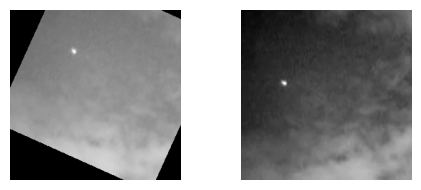

In [41]:
res = augment(pict)

originp = np.array(pict)
gaussp = np.array(res)

fig, axes = plt.subplots(1, 2, figsize=(5, 2))
# plt.imshow(gaussp[0,0], cmap='gray')
axes[0].imshow(gaussp[1], cmap='gray')
axes[0].axis('off')  # 关闭坐标轴显示
    
axes[1].imshow(originp[1], cmap='gray')
axes[1].axis('off')  # 同样关闭坐标轴显示
# plt.title('Blurred Image')
plt.tight_layout()
plt.show()

(-0.5, 255.5, 255.5, -0.5)

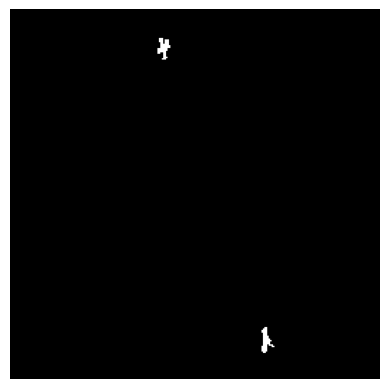

In [58]:
label = torch.load("./temp_label.pt")
label = (np.array(label) * 255).astype(np.uint8)
plt.imshow(label[-1, 0], cmap='gray')
plt.axis("off")

In [63]:
a = np.array(cv2.imread("result/20240812T12-46-54_gauss9_1_irstd1k/nudt_result.png", 0))

In [64]:
print(a.shape)

(8181, 755)
